# An Introduction To Exploratory Data Analysis and Hypothesis Testing

## EDA (Exploratory Data Analysis)

Understanding the shape of the distribution of your data is an imperative to informing hypotheses about your data.  By understanding the various 1 dimensional projections (aka columns) of your dataset, you'll be able to understand what statistical questions to ask which inform your early analysis.

The true beginning of any data science project _should_ be a conversation, however it's hard to get what you need without anything to show.  Exploratory data analysis is often the trojan horse to learn more of the domain expertise of your data as well as to get to know the client.

They see that you've done "something" and you get the opportunity to ask important questions like:

* does this sample or this data make sense given what stakeholder expects? 
* do the various columns mean what you think (based on the column names)?

By doing the exploratory data analysis, you can usually get answers to these questions.


## Techniques

* shape parameters of your distribution
    * measures of centrality
    * measures of spread
    * multiple centriods
* visualizing your dataset
    * histogram plotting
    * geospatial plotting
    * scatter plotting
    * timeseries plotting
* distributions
    * visualizing the normal distribution
    * visualizing the exponential distribution
    * visualizing the beta distribution
    * moment generating functions
        * a generalization of centrality
        * a generalization of spread

## Hypothesis Testing

* understanding the null and alternative hypothesis
* pvalues and their interpretation
* the statistic of a hypothesis test
* the power of a statistical test
* Example hypothesis tests
    * normality tests
        * Shapiro-Wilk Test
        * D’Agostino’s K^2 Test
        * Anderson-Darling Test
    * Correlation Tests
        * Pearson’s Correlation Coefficient
        * Spearman’s Rank Correlation
        * Kendall’s Rank Correlation
        * Chi-Squared Test
    * Parametric Statistical Hypothesis Tests
        * Student’s t-test
        * Paired Student’s t-test
        * Analysis of Variance Test (ANOVA)
        * Repeated Measures ANOVA Test
    * Nonparametric Statistical Hypothesis Tests
        * Mann-Whitney U Test
        * Wilcoxon Signed-Rank Test
        * Kruskal-Wallis H Test
        * Friedman Test
        
        
* a scheme for finding the distribution of your data (Optionally)
    * MLE
    * Sampling in Python when you need to consider multiple columns
    * Analyzing the results of your hypotheses

# References:

[Statistical Tests Cheatsheet](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

[NIST handbook](https://www.itl.nist.gov/div898/handbook/)


## Shape Parameters

In order to get some information about our distribution of data, we usually start with figuring out the center of our dataset.  The central tendency of our dataset has a relationship to the "expected value" of the data.  If our data is representative of the underlying population, then the central tendency is a good approxmation of what we can expect of our data over many repeated experiments from our data.

In [5]:
import numpy as np

arr = np.random.normal(0, 10, size=10)
arr.mean()

-2.6168993195216026

The above gives us the average of ten repeated sample data points.  If we want the expected value we need to see how the average converges over many repeated samples from the distribution.

In [9]:
arr = np.random.normal(0, 10, size=100000000)
arr.mean()

0.0016411209873510087

Notice that we use the same method to determined the expected value as we use to determine the average.  Unfortunately, the average only works with normally distributed data.  We'll need a broader notion of centrality to capture the expected value of any random variable.

In order to get more information about our distribution we'll ask about how spread out the data is.  This gives us a sense of the scale of the distribution of the data.  The scale or spread of the data can tell us how to compare a given data point against the entire distribution and how typical a given point is.  If a point is far away from the central tendency or expectation then it is likely atypical for the distribution.  If a point is nearby the center, it is likely much more expected.

In [36]:
arr = np.random.normal(0, 10, size=100000)
arr.std()

9.989376571859928

As we can see standard deviation or spread for this random variable is around 10.  What does this mean?  Well we can start to ask questions of our data, like - how likely is it that we get a data point of 10000, given that our data is normally distributed with a mean of 0 and standard deviation of 10 and 100000 data points?

We can start by answering the question visually.

(array([0.0010682, 0.       , 0.       , ..., 0.       , 0.       ,
        0.0010682]),
 array([-51.2438227 , -51.23446116, -51.22509962, ...,  42.35286433,
         42.36222587,  42.37158741]),
 <a list of 10000 Patch objects>)

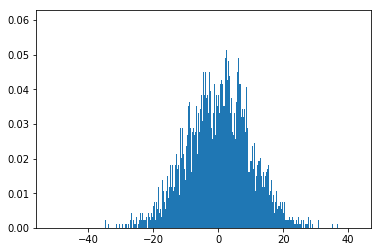

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(arr, bins=10000, density=True)

Given the scale of the distribution - which we can see on the x-axis, clearly the data point of 10000 is well outside what we'd expect for a data point, given this distribution of data.  

## Dealing with data that isn't normally distributed

What happens when our data isn't perfectly normally distributed?  Here's an example dataset that isn't exactly normally distributed:

In [127]:
from scipy.stats import skewnorm

skew_magnitude = 4
arr = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

To generate the above dataset we use a skew normal random variable, one that allows us to pass the third moment of the normal distribution directly.  Because the skew is positive, the tail of our distribution will be on the right.

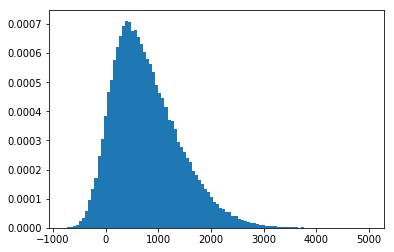

In [128]:
plt.hist(arr, bins=100, density=True)
plt.show()

How might we get a measure of center for a dataset that isn't perfectly normal?  The simple average might give us an approximating of the center:

In [129]:
arr.mean()

775.0773690359506

Let's compare this with what the median produces:

In [130]:
import statistics as st

st.median(arr)

673.6524771212421

In [131]:
skew_magnitude = -4
arr2 = skewnorm.rvs(skew_magnitude, loc=0, scale=1000, size=100000)

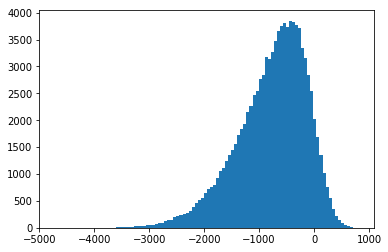

In [132]:
plt.hist(arr2, bins=100, density=False)
plt.show()

In [133]:
arr2.mean()

-771.9201454772459

In [134]:
st.median(arr2)

-672.9753868254722

As you can see here, the mean overstates the central tendency of the dataset by quite a bit!  So this tells us when our assumptions are violated we will need to make use of descriptive statistics which are robust to our assumptions needing to be relaxed

The major reason that the arithemtic mean overstates the average in this case is because of how it treats large values.  Recall the formula for the arithmetic mean:

$$ 1/N \sum_{i=0}^{i=N} X[i] $$

Where X is a list of numbers.

Because the sum treats all values equally, if you have one large number the average can shift by a lot.  

The way that robust descriptive statistics like the median get around this is by looking at the rank of the data.  How this works:

First the data is sorted into ascending order and then different sorted elements are used as alternative measures for centrality and spread.  While not perfectly robust, they do well with a lot of different distributions that are approximately normal but exhibiting some non-normal tendencies either by a non zero skew or a non zero kurtosis.

In [142]:
def interquartile_range(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    return q3 - q1

print("Median", np.percentile(arr, 50))
print("Interquartile Range", interquartile_range(arr))
print("Mean", arr.mean())
print("Standard Deviation", arr.std())

Median 673.6524771212421
Interquartile Range 840.351319347348
Mean 775.0773690359506
Standard Deviation 633.2153887790821


As you can see, the above robust statistics capture the same information - the center and the spread of the distribution, except because these are rank order statistics, they won't capture any information from the outliers.  This is because they only look at sorted order, these statistics are unaware of bias via outliers.

Another important robust descriptive statistic is the [trimean](https://en.wikipedia.org/wiki/Trimean).

In [144]:
def trimean(arr):
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    median = np.percentile(arr, 50)
    return (q1 + 2*median + q3)/4

print("Trimean", trimean(arr))

Trimean 701.7110944368526


"An advantage of the trimean as a measure of the center (of a distribution) is that it combines the median's emphasis on center values with the midhinge's attention to the extremes."

— Herbert F. Weisberg, Central Tendency and Variability

Before we leave our discussion of central tendency, it is possible that our data will not comfortably conform to one central tendency, it may be the case that multiple central tendencies are present, for this we will introduce the k means algorithm

In [168]:
from sklearn.cluster import KMeans

arr1 = np.random.normal(100, 50, size=10000)
arr2 = np.random.normal(800, 50, size=10000)
multi_center_dist = np.concatenate([arr1, arr2])

means = KMeans(n_clusters=2, 
               random_state=0, 
               max_iter=1000,
               n_init=100,
               tol=0.00001,
               algorithm="full").fit(multi_center_dist.reshape(-1, 1))
means.cluster_centers_

array([[ 99.82624339],
       [799.60974984]])

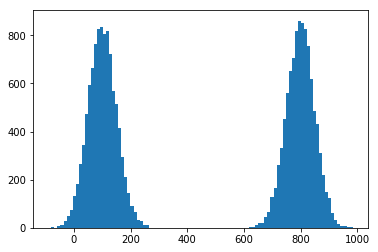

In [169]:
plt.hist(multi_center_dist, bins=100)
plt.show()

In [176]:
from sklearn.cluster import KMeans

arr1 = skewnorm.rvs(-2, loc=200, scale=50, size=1000)
arr2 = skewnorm.rvs(2, loc=800, scale=50, size=1000)
multi_center_dist = np.concatenate([arr1, arr2])

means = KMeans(n_clusters=2, 
               random_state=0, 
               max_iter=1000,
               n_init=100,
               tol=0.00001,
               algorithm="full").fit(multi_center_dist.reshape(-1, 1))
means.cluster_centers_

array([[163.9252768 ],
       [835.22386134]])

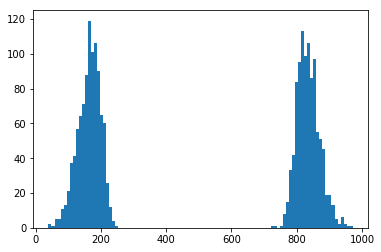

In [177]:
plt.hist(multi_center_dist, bins=100)
plt.show()

As you can see, the K-Means algorithm captures both of the centers of our distribution.  Additionally, KMeans can generalize to $R^{n}$ space, meaning we can capture a sense of a higher dimensional centrality directly, rather than looking at the marginal centrality of different aspects of our dataset. 